# Implement a feedforward neural network

In [1]:
import tensorflow as tf

In [2]:
# Load the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


In [3]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2956 - accuracy: 0.9140 - val_loss: 0.1418 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1446 - accuracy: 0.9574 - val_loss: 0.1072 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1080 - accuracy: 0.9675 - val_loss: 0.0841 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0866 - accuracy: 0.9729 - val_loss: 0.0760 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.0782 - val_accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0654 - accuracy: 0.9794 - val_loss: 0.0741 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0573 - accuracy: 0.9813 - val_loss: 0.0747 - val_accura

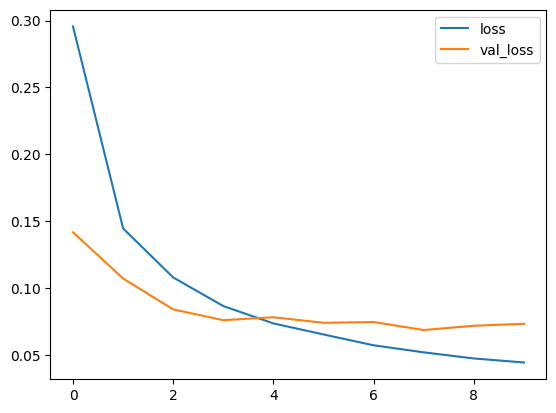

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

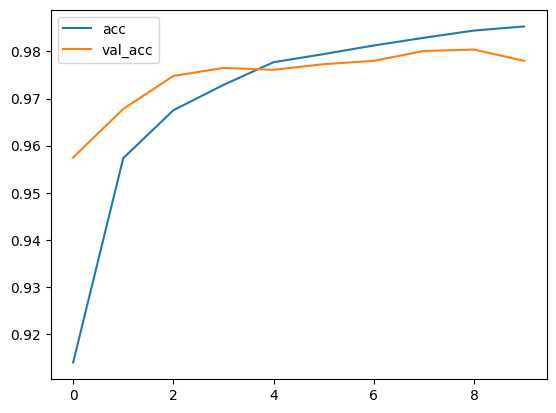

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0734 - accuracy: 0.9780
[0.07335181534290314, 0.9779999852180481]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 971    0    2    1    1    0    2    1    2    0]
 [   0 1125    4    0    0    0    2    1    3    0]
 [   7    1 1008    3    4    0    2    4    3    0]
 [   0    0    2  994    0    3    0    5    3    3]
 [   2    0    3    1  957    0    5    2    0   12]
 [   2    0    0   11    3  864    4    2    5    1]
 [   7    3    1    1    5    2  938    0    1    0]
 [   3    9   10    3    0    0    0  995    2    6]
 [   5    1    3    3    4    1    3    3  948    3]
 [   1    2    0   10    6    4    0    4    2  980]]


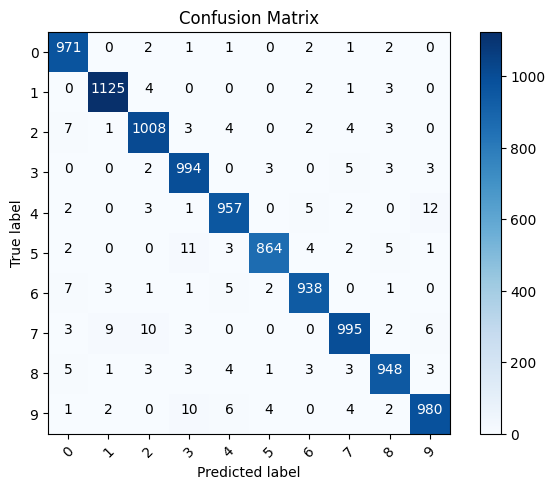

In [ ]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

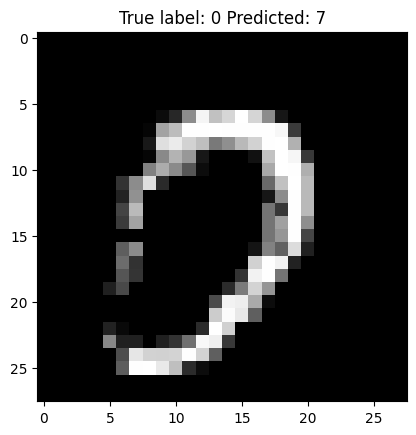

In [ ]:
# Misclassified examples
misclassified_idx = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));